In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [5]:
nasdaq = pd.read_excel('Data/listings.xlsx', sheetname = 'nasdaq', na_value = 'n/a')
market_cap = nasdaq['Market Capitalization'].div(10**6)

In [6]:
# stats summary
market_cap.mean()

3180.7126214953805

In [7]:
market_cap.median()

225.9684285

In [8]:
market_cap.mode()

0    0.0
dtype: float64

In [11]:
# variance and standard variation
variance = market_cap.var()

In [14]:
np.sqrt(variance)

25471.038707093518

In [15]:
market_cap.std()

25471.038707093518

In [16]:
# distribution
median = market_cap.quantile(0.5)

In [17]:
median == market_cap.median()

True

In [19]:
quantiles = market_cap.quantile([0.25, 0.75])
quantiles[0.75] - quantiles[0.25]

926.5292771575

In [20]:
deciles = np.arange(start=0.1, stop=0.91, step=.1)
deciles

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [22]:
market_cap.quantile(deciles)

0.1       4.884565
0.2      26.993382
0.3      65.714547
0.4     124.320644
0.5     225.968428
0.6     402.469678
0.7     723.163197
0.8    1441.071134
0.9    3671.499558
Name: Market Capitalization, dtype: float64

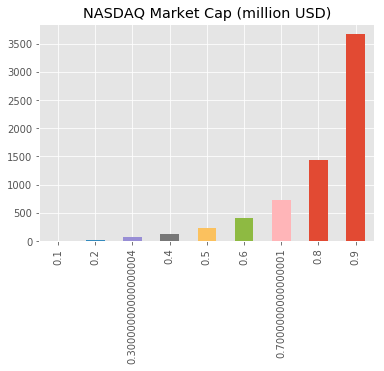

In [28]:
# bar chart
title = 'NASDAQ Market Cap (million USD)'
market_cap.quantile(deciles).plot(kind='bar', title=title)
#plt.tight_layout()
plt.show()

In [29]:
market_cap.describe()

count      3167.000000
mean       3180.712621
std       25471.038707
min           0.000000
25%          43.375930
50%         225.968428
75%         969.905207
max      740024.467000
Name: Market Capitalization, dtype: float64

In [31]:
market_cap.describe(percentiles=np.arange(0.1, 0.91, 0.1))

count      3167.000000
mean       3180.712621
std       25471.038707
min           0.000000
10%           4.884565
20%          26.993382
30.0%        65.714547
40%         124.320644
50%         225.968428
60%         402.469678
70%         723.163197
80%        1441.071134
90%        3671.499558
max      740024.467000
Name: Market Capitalization, dtype: float64

In [32]:
# seaborn histogram
import seaborn as sns

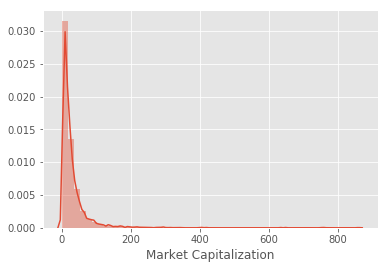

In [38]:
sns.distplot(np.sqrt(market_cap))

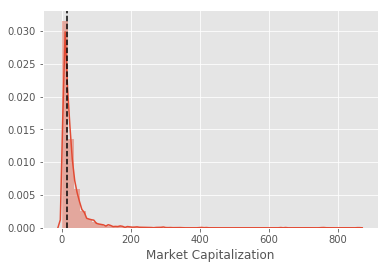

In [39]:
ax = sns.distplot(np.sqrt(market_cap))
ax.axvline(np.sqrt(market_cap).median(), color = 'black', ls = '--')

In [ ]:
# categorical varaibles

In [43]:
amex = pd.read_excel('Data/listings.xlsx', sheetname = 'amex', na_value='n/a')
amex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
Stock Symbol             360 non-null object
Company Name             360 non-null object
Last Sale                346 non-null float64
Market Capitalization    360 non-null float64
IPO Year                 105 non-null float64
Sector                   238 non-null object
Industry                 238 non-null object
dtypes: float64(3), object(4)
memory usage: 19.8+ KB


In [44]:
amex.Sector.nunique()

12

In [46]:
amex.apply(lambda x: x.nunique())

Stock Symbol             360
Company Name             326
Last Sale                323
Market Capitalization    317
IPO Year                  24
Sector                    12
Industry                  68
dtype: int64

In [47]:
# zoom in data
amex.Sector.value_counts()

Health Care              49
Basic Industries         44
Energy                   28
Consumer Services        27
Capital Goods            24
Technology               20
Consumer Non-Durables    13
Finance                  12
Public Utilities         11
Miscellaneous             5
Consumer Durables         4
Transportation            1
Name: Sector, dtype: int64

In [48]:
amex['IPO Year'].value_counts()

2002.0    19
2015.0    11
1999.0     9
1993.0     7
2014.0     6
2004.0     5
2013.0     5
2017.0     5
2003.0     5
1992.0     4
2005.0     3
2006.0     3
2016.0     3
1986.0     3
2011.0     3
2007.0     3
1997.0     2
1988.0     2
1998.0     2
2009.0     1
1991.0     1
1996.0     1
1990.0     1
1987.0     1
Name: IPO Year, dtype: int64

In [50]:
ipo_by_yr = amex['IPO Year'].dropna().astype(int).value_counts()
ipo_by_yr

2002    19
2015    11
1999     9
1993     7
2014     6
2004     5
2003     5
2017     5
2013     5
1992     4
2006     3
2005     3
2007     3
2016     3
2011     3
1986     3
1998     2
1997     2
1988     2
2009     1
1996     1
1991     1
1990     1
1987     1
Name: IPO Year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

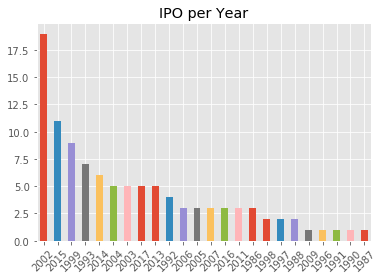

In [51]:
ipo_by_yr.plot(kind='bar', title='IPO per Year')
plt.xticks(rotation = 45)